In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Health_insurance_cost.xlsx") # Loading the dataset
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# EDA (Exploratory Data Analysis)

In [3]:
df.shape # rows and columns of data

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


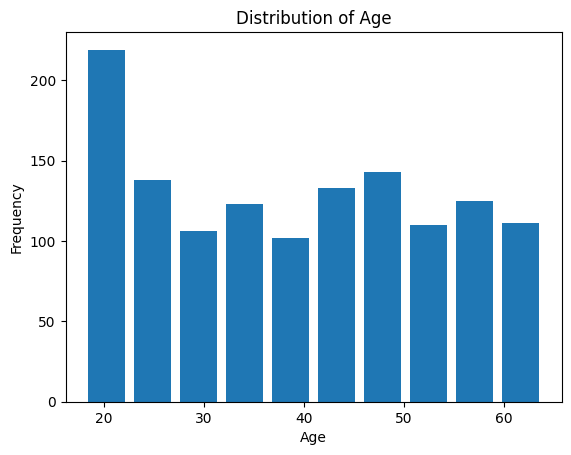

In [6]:
import matplotlib.pyplot as plt

# Create a histogram of the age column
plt.hist(df['age'], bins=10,rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

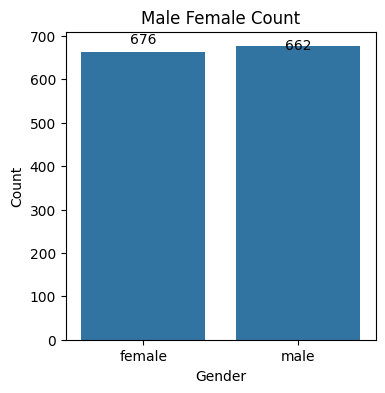

In [7]:
# Count Of Male and Female

plt.figure(figsize=(4, 4))
sns.countplot(x=df['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male Female Count")
for idx, count in enumerate(df['gender'].value_counts()):
    plt.text(idx, count, str(count), ha='center', va='bottom')

plt.show()



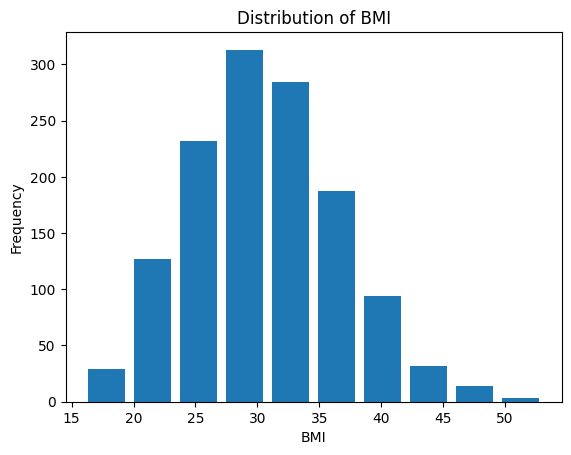

In [8]:

import matplotlib.pyplot as plt

# Create a histogram of the age column
plt.hist(df['BMI'], bins=10,rwidth=0.8)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

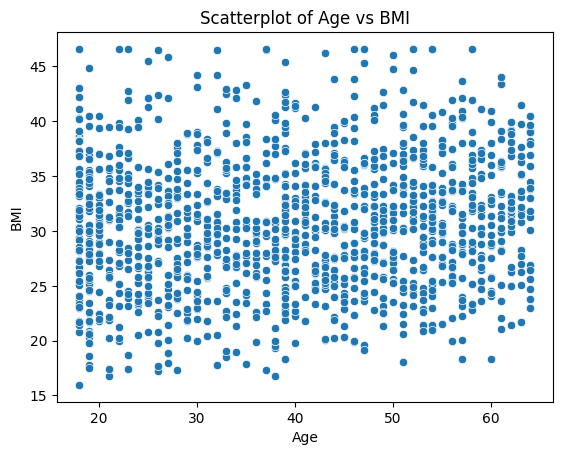

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation Between Age and BMI
x = df['age']
y = df['BMI']

sns.scatterplot(x=x, y=y)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatterplot of Age vs BMI')
plt.show()


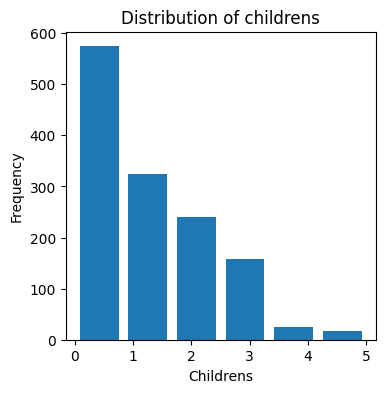

In [10]:
# Create a histogram of the age column
plt.figure(figsize=(4, 4))
plt.hist(df['Children'], bins=6,rwidth=0.8)
plt.xlabel('Childrens')
plt.ylabel('Frequency')
plt.title('Distribution of childrens')
plt.show()

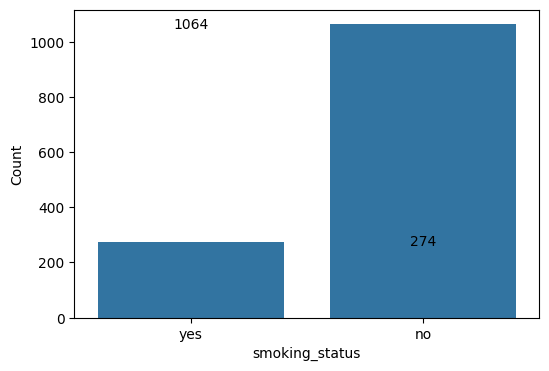

In [11]:
# Smking Status

plt.figure(figsize=(6, 4))
sns.countplot(x=df['smoking_status'])
plt.xlabel("smoking_status")
plt.ylabel("Count")
for idx, count in enumerate(df['smoking_status'].value_counts()):
    plt.text(idx, count, str(count), ha='center', va='center')

plt.show()

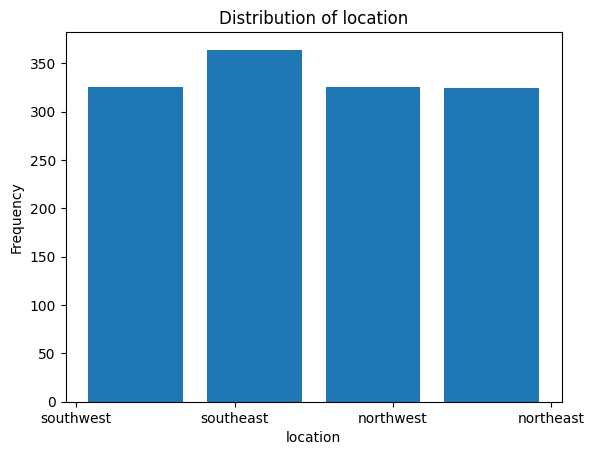

In [12]:
# Distribution of location

plt.hist(df['location'], bins=4,rwidth=0.8)
plt.xlabel('location')
plt.ylabel('Frequency')
plt.title('Distribution of location')
plt.show()

# Data Cleaning

In [13]:
# Checking Null values

df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [14]:
# imputing null values

df['age'].fillna(df['age'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['health_insurance_price'].fillna(df['health_insurance_price'].median(),inplace=True)

In [15]:
# SucccessfullyImputed

df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# Outlier Detection and Treatment

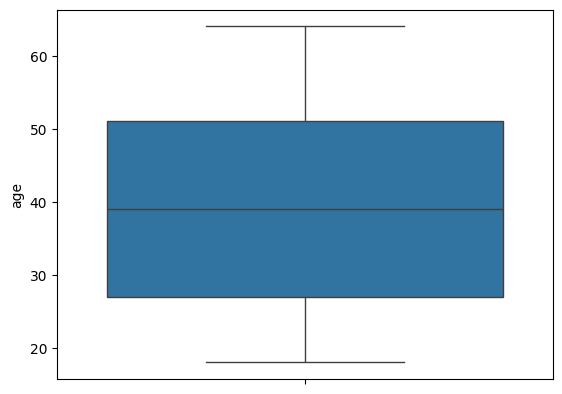

In [16]:
# Boxplot to indentify Outliers

sns.boxplot(df['age'])
plt.show()

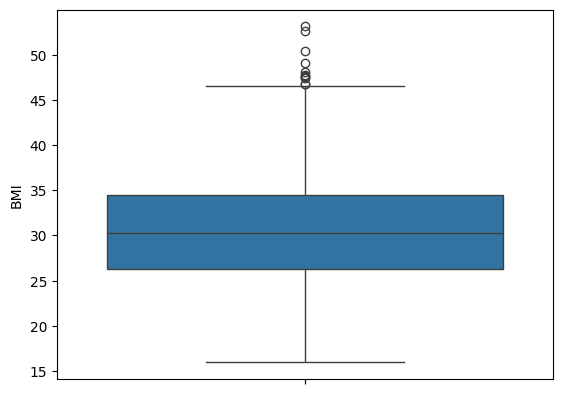

In [17]:
# Boxplot to indentify Outliers

sns.boxplot(df['BMI'])
plt.show()

In [18]:
# Treating outliers

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df['BMI'] = np.where((df['BMI'] > upper_bound),upper_bound,df['BMI'])

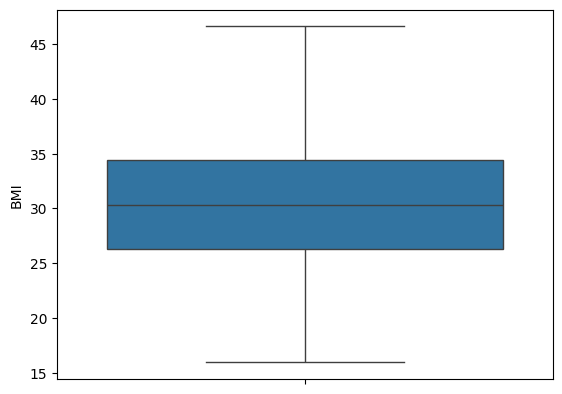

In [19]:
# Succcessfully treated outliers

sns.boxplot(df['BMI'])
plt.show()

# Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encoding data with the help of LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['location'] = encoder.fit_transform(df['location'])


In [21]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


# Feature Selection

In [22]:
# Correlation

df.corr()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,-0.017327,0.110503,0.041057,-0.021401,0.006794,0.294387
gender,-0.017327,1.000000,0.045681,0.017163,0.076185,0.004588,0.058559
BMI,0.110503,0.045681,1.000000,0.010755,0.002686,0.153455,0.194800
Children,0.041057,0.017163,0.010755,1.000000,0.007673,0.016569,0.067302
smoking_status,-0.021401,0.076185,0.002686,0.007673,1.000000,-0.002181,0.785603
location,0.006794,0.004588,0.153455,0.016569,-0.002181,1.000000,-0.005372
health_insurance_price,0.294387,0.058559,0.194800,0.067302,0.785603,-0.005372,1.000000


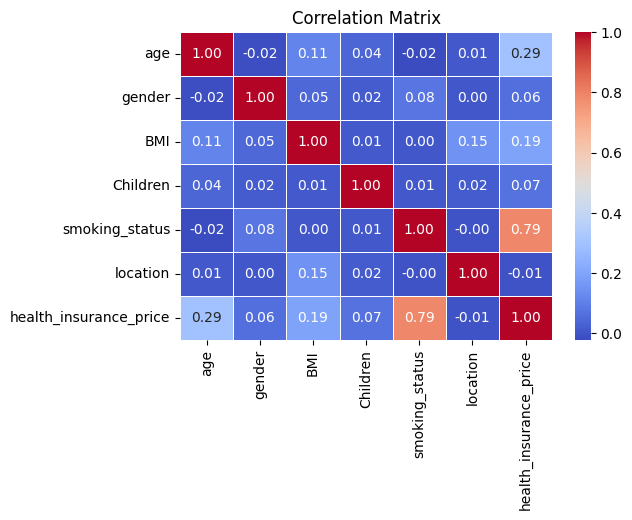

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## As we have limited features then have to use all the features even when there is poor correaltion

# It is e regression probelm so we have to use regression model

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your health insurance cost dataset
# Assume 'df' is your DataFrame containing the dataset

# Define features (X) and target variable (y)
X = df.drop('health_insurance_price', axis=1)
y = df['health_insurance_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 2. Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# 3. Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# 4. XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Evaluate models on the test set
linear_reg_preds = linear_reg.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
xgboost_preds = xgboost_model.predict(X_test)

# Print evaluation metrics
print("\nLinear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, linear_reg_preds))
linear_reg_model = r2_score(y_test, linear_reg_preds)
print("LR R2 Score:",linear_reg_model)

print("\nDecision Tree Metrics:")
print("MSE:", mean_squared_error(y_test, decision_tree_preds))
Decision_tree_model = r2_score(y_test, decision_tree_preds)
print("DT R2 Score:", Decision_tree_model)

print("\nRandom Forest Metrics:")
print("MSE:", mean_squared_error(y_test, random_forest_preds))
Random_forest_model = r2_score(y_test, random_forest_preds)
print("RF R2 Score:", Random_forest_model)

print("\nXGBoost Metrics:")
print("MSE:", mean_squared_error(y_test, xgboost_preds))
XGboost_model = r2_score(y_test, xgboost_preds)
print("XG R2 Score:", XGboost_model)




Linear Regression Metrics:
MSE: 34882971.1328264
LR R2 Score: 0.7749937167922669

Decision Tree Metrics:
MSE: 44139304.45147541
DT R2 Score: 0.7152874163102769

Random Forest Metrics:
MSE: 23512984.212618068
RF R2 Score: 0.8483337567589063

XGBoost Metrics:
MSE: 26189268.467600588
XG R2 Score: 0.8310708702138346


# Comparison of models

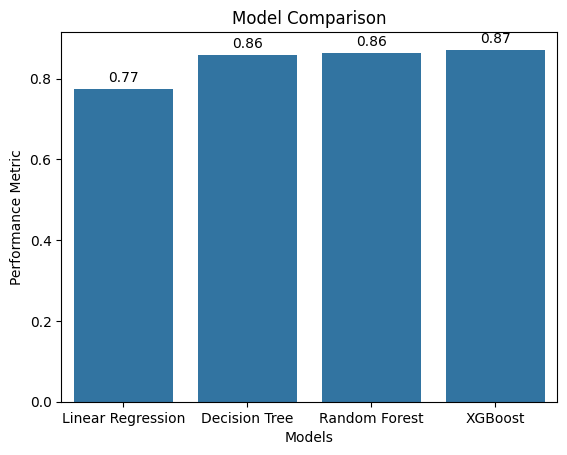

In [25]:
L1 = [linear_reg_model,Decision_tree_model,Random_forest_model,XGboost_model]

# Models' names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Creating a bar plot with values displayed on the bars
ax = sns.barplot(x=model_names, y=L1)

# Displaying the values on the bars
for i, v in enumerate(L1):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Performance Metric')
plt.title('Model Comparison')
plt.show()